# Study of spatial temporal human behaviour in forecasting the dengue activity in subzones

Datasets
1. Subzone traffic (23 May 2016 to 2 June 2016)
2. Dengue cases (same)
3. Breeding habitat data (same)

Week 5 progress
1. Preprocessing pipeline fully automated
2. New Features
3. Model building + ensembling


For the second phase of the study, data over a time period of 1 week has been obtained. In addition to the initial features, there will be exploration focused on how the changes in the rates of human movement and other factors affect dengue activity or act as an indicator of future dengue activity. 

There will be 2 stages of forecasting, the first layer of models will predict the future status of the subzone while the second layer will predict if there is an increase or decrease in the number of reported cases. 


## Preprocessing
Utility class (util.py) was made as an facade class so user can manipulate the parameters without having to edit the 3 components, namely:
* graph.py - opens graph files. Returns a networkx directional graph.
* shape.py - opens various shapefiles and preprocesses. Returns a pandas dataframe
* features.py - 5 feature classes which takes in graph files and control parameters. Returns numpy array.

Node, edge, breeding habitat dataframes that have been processed are stored as .csv files in Data/Processed/Storage to do away with repeated preprocessing of old files. util.py will check if files for the corresponding dates exist before carrying out preprocessing. 

Graph files have their node attributes only (edge weights not stored as not required for delta features) saved into a .csv file after basic features are built. util.py will check if files for the corresponding dates exist before carrying out basic feature building. Graph.py has FastGraphGenerator class which will open the stored node attribute files as a normal networkx graph.


In [1]:
from util import *
from features import BasicFeatureBuilder, BadNeighbours, DeltaFeatureBuilder, DailyChange



/Users/sylvesterchin/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# assuming a study period of 3 days and predicting 1 day ahead (5-day sliding window)

list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]

#X, y_status = load_multiple_data(list_, study_period=3, ahead=1, delta=True, pred_movement=False)

#X1, y_move = load_multiple_data(list_, study_period=3, ahead=1, delta=False, pred_movement=True)

In [3]:
# to save time, load in pre-processed data
X = np.genfromtxt('featuresNodelta.csv', delimiter=',')
X1 = np.genfromtxt('featuresWdelta.csv', delimiter=',')
y_status = np.genfromtxt('labelStatus.csv', delimiter=',')
y_move = np.genfromtxt('labelMovement.csv', delimiter=',')

print X.shape
print X1.shape

(1260, 40)
(1260, 26)


X contains the basic features and the day on day changes for each day of the study period.
X1 contains the basic features and the end-start difference in all the features during the study period.

### Movement trends
1 represents increase in number of cases while 0 represents no change or decreaes in number of cases

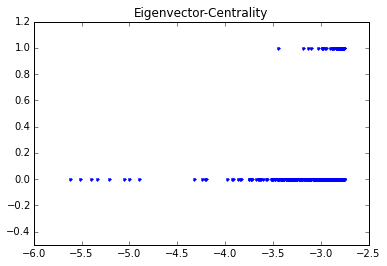

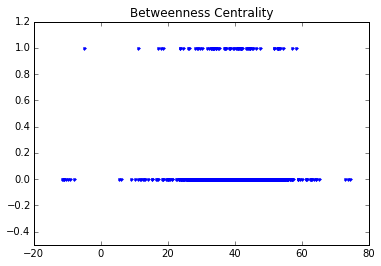

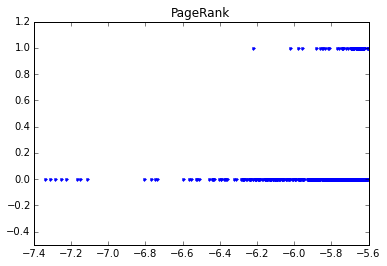

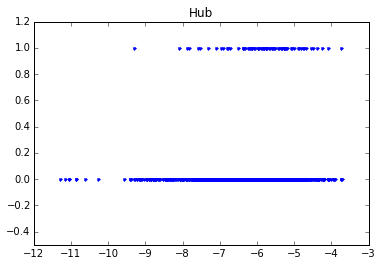

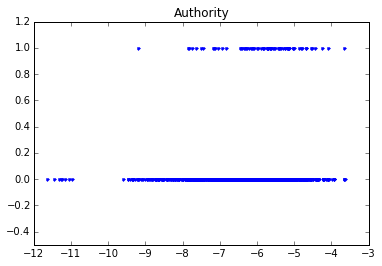

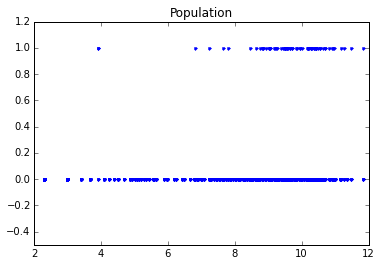

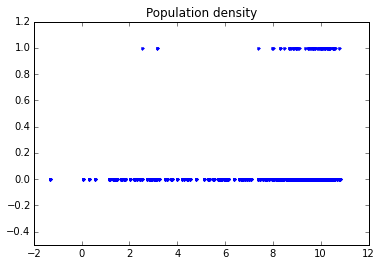

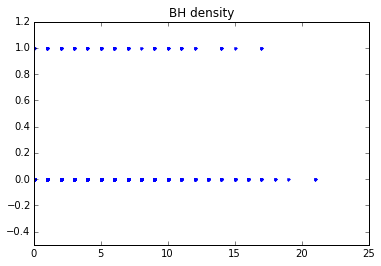

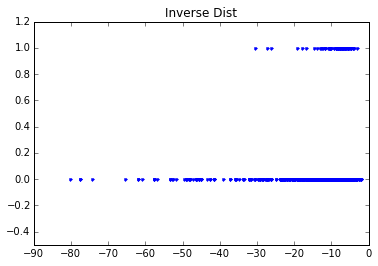

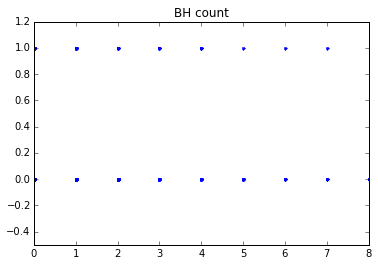

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

df1=pd.DataFrame(X)
df2=pd.DataFrame(X1)

plt.title("Eigenvector-Centrality")
plt.plot(np.log(df2[0]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Betweenness Centrality")
plt.plot(np.log(df2[1]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("PageRank")
plt.plot(np.log(df2[2]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Hub")
plt.plot(np.log(df2[3]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Authority")
plt.plot(np.log(df2[4]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Population")
plt.plot(np.log(df2[5]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Population density")
plt.plot(np.log(df2[6]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("BH density")
plt.plot(df2[7], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Inverse Dist")
plt.plot(np.log(df2[8]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("BH count")
plt.plot(df2[9], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

Note: labels reflect the increase/decrease in case from the last day of the study period to the target date (1 day apart) as compared to the phase 1 of the project which focused on classifying the subzones without any prior knowledge of its current status

### Trends in number of cases over time
Eyeball data set to spot any trend in case number

In [5]:
from shape import *
from util import make_file_path

list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]
shape = "shape/subzone.shp"
cases=[]
for date in list_:
    caselist, bhlist, network = make_file_path(date)
    DC = DengueCaseExtractor(caselist, shape)
    cases.append(DC.list_)

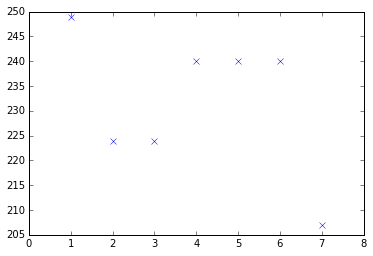

In [6]:
def sum(list_):
    sum=0
    for i, day in enumerate(list_):
        sum+=int(day[1])
    return sum

daylist = [sum(day) for day in cases]

range=[1,2,3,4,5,6,7]
plt.plot(range, daylist, 'x')
plt.xlim((0,8))
plt.show()


## New Features

With time-based data, new features such as change over study period and daily changes can be calculated.

### 1. Delta of basic features (DF)
The difference between end of study period and start of study period are calculated for 13 basic features that are not fixed in the short term such as population count and area of the subzone. 

12 of such features are computed using the class DeltaFeatureBuilder


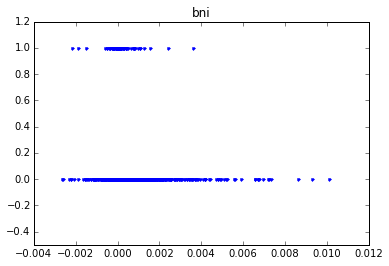

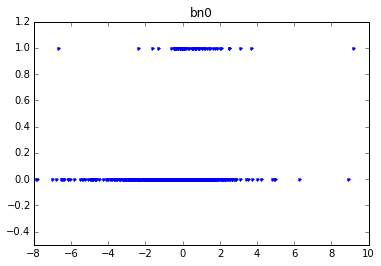

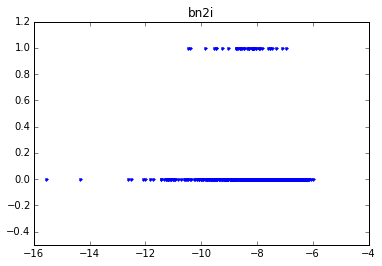

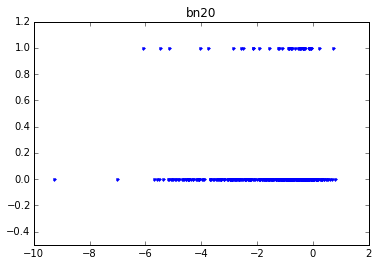

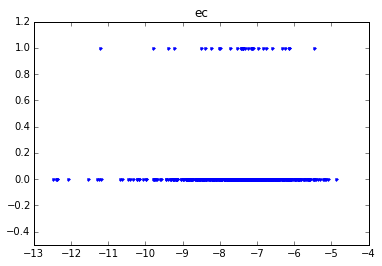

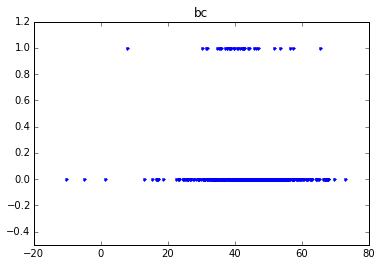

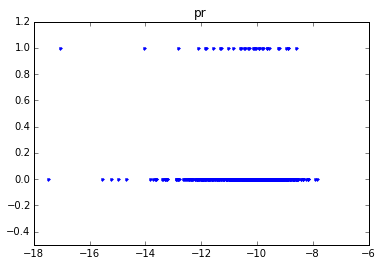

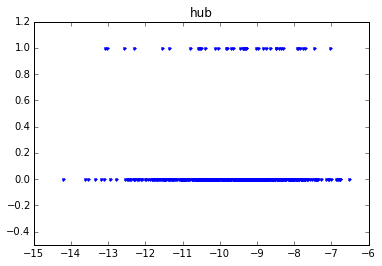

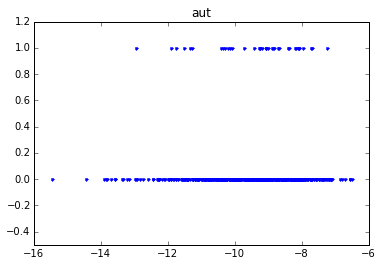

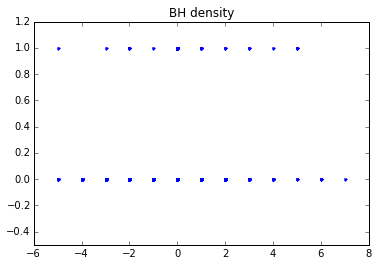

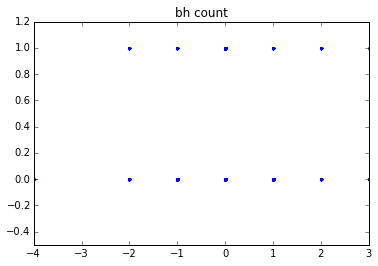

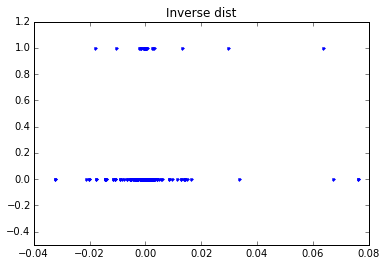

In [7]:
plt.title("bni")
plt.plot(df2[14], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("bn0")
plt.plot(df2[15], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("bn2i")
plt.plot(np.log(df2[16]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("bn20")
plt.plot(np.log(df2[17]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("ec")
plt.plot(np.log(df2[18]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("bc")
plt.plot(np.log(df2[19]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("pr")
plt.plot(np.log(df2[20]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("hub")
plt.plot(np.log(df2[21]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("aut")
plt.plot(np.log(df2[22]), y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("BH density")
plt.plot(df2[23], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("bh count")
plt.plot(df2[24], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

plt.title("Inverse dist")
plt.plot(df2[25], y_move, '.')
plt.ylim((-0.5,1.2))
#plt.xlim((-0.9, 1.1))
plt.show()

#### Delta Feature's importance 
*when predicting future status, not movement

The basic features still rank higher than the change in feature value over the duration the study period. However there is a lack of data to prove the robustness of the results. The only delta features that rank higher than any basic feature are the changes in pagerank-score and breeding habit density.

(945, 14)
1. Feature 6 (0.133927)
2. Feature 5 (0.126223)
3. Feature 4 (0.049248)
4. Feature 3 (0.045006)
5. Feature 1 (0.044966)
6. Feature 7 (0.044092)
7. Feature 10 (0.041680)
8. Feature 2 (0.041423)
9. Feature 9 (0.041320)
10. Feature 0 (0.039127)
11. Feature 13 (0.032241)
12. Feature 12 (0.030962)
13. Feature 8 (0.026861)
14. Feature 20 (0.026619)
15. Feature 11 (0.025945)
16. Feature 25 (0.025833)
17. Feature 23 (0.025642)
18. Feature 14 (0.025562)
19. Feature 24 (0.025538)
20. Feature 18 (0.024716)
21. Feature 19 (0.023955)
22. Feature 22 (0.021311)
23. Feature 21 (0.020037)
24. Feature 15 (0.019778)
25. Feature 17 (0.019424)
26. Feature 16 (0.018562)


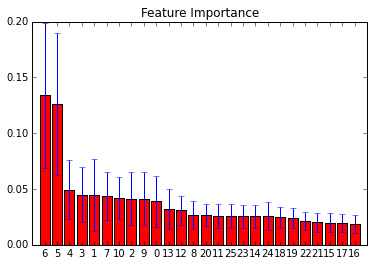

In [10]:
from train import build_X_y, feature_rank
list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]

#0-13 is basic, 14- is delta
predmove = False
X_delta, y_delta = build_X_y(list_, study_period=3, ahead=2, delta=True, pred_movement=predmove) # basic + delta
feature_rank(X_delta, y_delta)

Most of the features in the middle band are day-on-day changes which shows the culmulative importance in contributing to the predictive strength of the model. Features 0-9 are the basic features while the remaining are day-on-day changes. 

As study period increases, the number of features will increase as well.

### 2. Daily Changes (DC)
Day-on-day changes are also used as a possible feature since they provide greater insight into the trend as compared to net change over the period of time.

Daily changes and delta features are not used in the same model at one time since the features may be correlated (sum of daily changes is equal to the value of the delta over study period).



## Model Building

List of classifiers used
1. Logistic Regression
2. Support Vector Machines (Linear and RBF kernel)
3. Tree-based models (random forest and extra randomised trees)
4. K-nearest classifier

Ensembling
1. Boosting (gradient boost and XGBoost)
2. Bagging
3. Voting (hard voting with 3 models)

The two labels to predict are status (active or passive) and movement (increase or stagnant/decrease).

### PR-AUC Curve

To choose the appropriate classifier, we have to look at how their precision and recall changes.

Precision refers to the true positive/(true positives + false positives). The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Recall refers to true postitive/(true positives + false negatives).The recall is intuitively the ability of the classifier to find all the positive samples.

When predicting dengue activity movement in subzones, the logistic regression model gives a highest pr_auc of 0.2225 for class 1 which represents any increase in dengue activity.

(945, 14)
(945, 26)


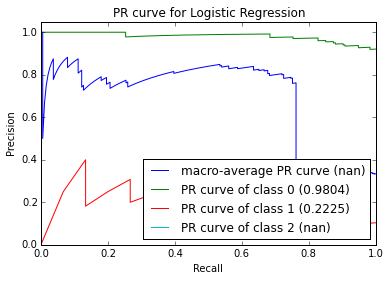

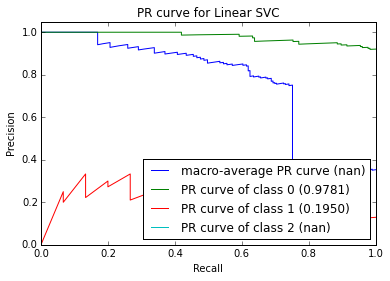

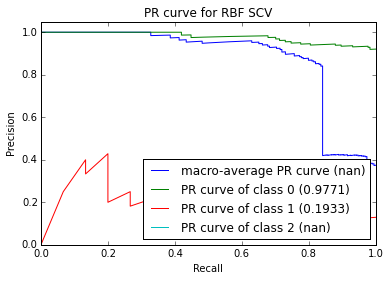

In [13]:
from train import plot_pr_auc, build_X_y
from model import log_reg_model, rbf_svc_model, linear_svc_model
list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]
X, y =build_X_y(list_, study_period=3, ahead=2, delta=False, pred_movement=True) # basic + delta
plot_pr_auc(X, y, log_reg_model()[1], "Logistic Regression")

plot_pr_auc(X, y, linear_svc_model()[1], "Linear SVC")

plot_pr_auc(X, y, rbf_svc_model()[1], "RBF SCV")

### Effects of study period and days ahead on model performance

In order to find the balance between study period and days ahead to predict, a graph will be plot to find the "sweet spot" for model building. 

Note that basic features used in the models belong to the first day of the study period, hence the prediction is actually the sum of study period and days ahead if only basic features are used in the model.

(1575, 14)
(1260, 14)
(945, 14)
(630, 14)


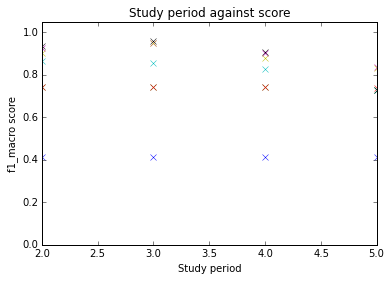

In [14]:
from train import check_study_period
check_study_period()

(1260, 14)
(945, 14)
(630, 14)
(315, 14)


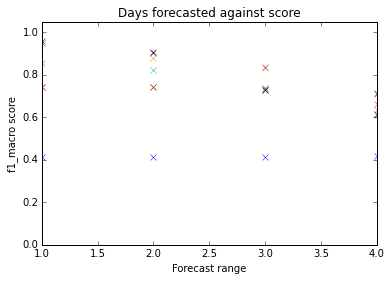

In [15]:
from train import check_ahead_period
check_ahead_period()

### Movement
Most of the models score poorly 

In [17]:
from train import *
list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]

predmove = True
X, y = build_X_y(list_, study_period=3, ahead=2, delta=False, pred_movement=predmove) # basic + daily
# basic features + daily change to predict movement
apply_model(X, y, ensemble=False, predmove=predmove)


(945, 14)
(945, 26)
Dummy
CV score (f1): 0.0000 (+/- 0.00)
[ 0.  0.  0.  0.  0.]
Classification Report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       177
          1       0.00      0.00      0.00        12

avg / total       0.88      0.94      0.91       189

0.0
Confusion Matrix:
[[177   0]
 [ 12   0]]
 
 
LogisticRegression
CV score (f1): 0.2963 (+/- 0.12)
[ 0.23076923  0.3125      0.39215686  0.31707317  0.22916667]
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.75      0.85       177
          1       0.18      0.83      0.30        12

avg / total       0.93      0.75      0.81       189

0.298507462687
Confusion Matrix:
[[132  45]
 [  2  10]]
 
 
LinearSVC
CV score (f1): 0.3303 (+/- 0.24)
[ 0.24390244  0.30769231  0.5625      0.31707317  0.22018349]
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.75      

### Status
Models are able to predict future status of the subzone (without knowledge of current state), up to 0.90 f1_macro.


In [18]:
from train import *
list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]

predmove = False
X, y = build_X_y(list_, study_period=3, ahead=2, delta=True, pred_movement=predmove) # basic + daily
# basic features + daily change to predict movement
apply_model(X, y, ensemble=False, predmove=predmove)

(945, 14)
Dummy
CV score (f1): 0.0000 (+/- 0.00)
[ 0.  0.  0.  0.  0.]
Classification Report:
             precision    recall  f1-score   support

          0       0.71      1.00      0.83       135
          1       0.00      0.00      0.00        54

avg / total       0.51      0.71      0.60       189

0.0
Confusion Matrix:
[[135   0]
 [ 54   0]]
 
 
LogisticRegression
CV score (f1): 0.6529 (+/- 0.04)
[ 0.66141732  0.63333333  0.6557377   0.68613139  0.62809917]
Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.81      0.86       135
          1       0.63      0.83      0.72        54

avg / total       0.84      0.81      0.82       189

0.72
Confusion Matrix:
[[109  26]
 [  9  45]]
 
 
LinearSVC
CV score (f1): 0.6303 (+/- 0.05)
[ 0.64748201  0.60176991  0.64957265  0.65625     0.59649123]
Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.82      0.87       135
     

## Ensembling models

### 1. Voting Classifier
For predicting movement in dengue cases, logistic regression model, linear SVC model and gradient boosting model are used with "hard" vote rule put in place. 

The result is a higher true positive and equal true negative rate as compared to the best performer (logistic). 


For predicting future dengue activity (active or passive), with a study period of 3 days and forecasting 2 days ahead, 
the random forest model, k-nearest model and XGBoost model are used with "hard" vote.

The result is a higher f1_macro score of 91.18% vs random forest model's score of 90.37%.

In [25]:
clf1 = log_reg_model()[1]
clf2 = voting_ensemble()[1]

clf3 = random_forest_model()[0]
clf4 = voting_ensemble()[0]

list1 = [clf1, clf2]
list2 = [clf3, clf4]
def compare(list_, X, y):
    for i, clf in enumerate(list_): # use f1_macro scoring method for optimal performance (dummy estimator will have a 0.00 score)
        scores = cross_validation.cross_val_score(clf, X, y, cv = 5, scoring = "f1_macro", n_jobs = -1)
        print "CV score ("+"f1_macro"+")"+": %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
        print scores
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print "Classification Report:"
        print metrics.classification_report(y_test, y_pred)
        print f1_score(y_test, y_pred, average='macro')
        cm = confusion_matrix(y_test, y_pred)

        print "Confusion Matrix:"
        print cm
        print " "
        print "===================================================="
        print " "

In [26]:
list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]
predmove = True
X, y = build_X_y(list_, study_period=3, ahead=2, delta=False, pred_movement=predmove)
compare(list1, X, y)

(945, 14)
(945, 26)
CV score (f1_macro): 0.5503 (+/- 0.13)
[ 0.47045708  0.58662975  0.64867782  0.56329849  0.48244048]
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.75      0.85       177
          1       0.18      0.83      0.30        12

avg / total       0.93      0.75      0.81       189

0.298507462687
Confusion Matrix:
[[132  45]
 [  2  10]]
 
 
CV score (f1_macro): 0.5993 (+/- 0.18)
[ 0.50847523  0.58112875  0.75218531  0.63799115  0.51650904]
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.80      0.88       177
          1       0.20      0.75      0.32        12

avg / total       0.93      0.80      0.85       189

0.321428571429
Confusion Matrix:
[[142  35]
 [  3   9]]
 
 


In [28]:
predmove = False
X, y = build_X_y(list_, study_period=3, ahead=2, delta=True, pred_movement=predmove)
compare(list2, X,y)

(945, 14)
CV score (f1_macro): 0.9013 (+/- 0.07)
[ 0.93910256  0.94429708  0.89952153  0.87440191  0.84893532]
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.93      0.95       135
          1       0.84      0.91      0.88        54

avg / total       0.93      0.93      0.93       189

0.875
Confusion Matrix:
[[126   9]
 [  5  49]]
 
 
CV score (f1_macro): 0.8479 (+/- 0.06)
[ 0.8677538   0.86184211  0.84221072  0.87345768  0.79439508]
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.90      0.93       135
          1       0.79      0.89      0.83        54

avg / total       0.91      0.90      0.90       189

0.834782608696
Confusion Matrix:
[[122  13]
 [  6  48]]
 
 


### 2. Boosting

GradientBoostingClassifier and XGBoostClassifier have underperformed in both label-types. Tree-based and K-nearest methods were better at predicting future status while linear support-vector classifiers and logistic regression models could predict change in dengue activity better.

*could be due to bad tuning of XGBoost



### 3. Bagging
